# Import Libraries

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
pd.set_option("display.max.columns", None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import plotly.graph_objects as go

from tapy import Indicators

from sklearn.metrics import mean_absolute_error, mean_squared_error

# D1 Timeframe

In [2]:
# read in 2019 full year 1 hour timeframe price data
df_d1_merge = pd.read_csv('../data/df_d1_merge.csv', index_col=0)
df_d1_merge.index = pd.to_datetime(df_d1_merge.index)
df_d1_merge = df_d1_merge.dropna()
df_d1_merge.head()

,open,high,low,close,results
2003-01-01,1.0504,1.0504,1.0468,1.0476,0
2003-01-02,1.0475,1.0488,1.0338,1.0384,1
2003-01-03,1.0383,1.0437,1.0342,1.0423,1
2003-01-05,1.0420,1.0451,1.0418,1.0448,1
2003-01-06,1.0447,1.0496,1.0425,1.0440,1


In [3]:
df_d1_merge.shape

(5300, 5)

## Day of the Week

In [4]:
# Add day of the week
df_d1_merge['day_of_wk'] = df_d1_merge.index
df_d1_merge['day_of_wk'] = df_d1_merge['day_of_wk'].dt.dayofweek
df_d1_merge.head()

,open,high,low,close,results,day_of_wk
2003-01-01,1.0504,1.0504,1.0468,1.0476,0,2
2003-01-02,1.0475,1.0488,1.0338,1.0384,1,3
2003-01-03,1.0383,1.0437,1.0342,1.0423,1,4
2003-01-05,1.0420,1.0451,1.0418,1.0448,1,6
2003-01-06,1.0447,1.0496,1.0425,1.0440,1,0


## Close Prices Shifts

In [5]:
df_d1_merge['shift_01'] = df_d1_merge['close'].shift(1)
df_d1_merge['close_shift_01_dist'] = (df_d1_merge['close'] - df_d1_merge['shift_01'])*1000

df_d1_merge['shift_02'] = df_d1_merge['close'].shift(2)
df_d1_merge['close_shift_02_dist'] = (df_d1_merge['close'] - df_d1_merge['shift_02'])*1000

df_d1_merge['shift_03'] = df_d1_merge['close'].shift(3)
df_d1_merge['close_shift_03_dist'] = (df_d1_merge['close'] - df_d1_merge['shift_03'])*1000

df_d1_merge['shift_05'] = df_d1_merge['close'].shift(5)
df_d1_merge['close_shift_05_dist'] = (df_d1_merge['close'] - df_d1_merge['shift_05'])*1000

df_d1_merge['shift_08'] = df_d1_merge['close'].shift(8)
df_d1_merge['close_shift_08_dist'] = (df_d1_merge['close'] - df_d1_merge['shift_08'])*1000

df_d1_merge['shift_13'] = df_d1_merge['close'].shift(13)
df_d1_merge['close_shift_13_dist'] = (df_d1_merge['close'] - df_d1_merge['shift_13'])*1000

df_d1_merge['shift_21'] = df_d1_merge['close'].shift(21)
df_d1_merge['close_shift_21_dist'] = (df_d1_merge['close'] - df_d1_merge['shift_21'])*1000

df_d1_merge['shift_34'] = df_d1_merge['close'].shift(34)
df_d1_merge['close_shift_34_dist'] = (df_d1_merge['close'] - df_d1_merge['shift_34'])*1000

df_d1_merge['shift_55'] = df_d1_merge['close'].shift(55)
df_d1_merge['close_shift_55_dist'] = (df_d1_merge['close'] - df_d1_merge['shift_55'])*1000

df_d1_merge['shift_89'] = df_d1_merge['close'].shift(89)
df_d1_merge['close_shift_87_dist'] = (df_d1_merge['close'] - df_d1_merge['shift_89'])*1000

In [6]:
#df_d1_merge.boxplot(column=["close_shift_01_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_shift_02_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_shift_03_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_shift_05_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_shift_08_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_shift_13_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_shift_21_dist"], by=['results'])

In [7]:
df_d1_merge['shift_02m01'] = (df_d1_merge['shift_02'] - df_d1_merge['shift_01'])*1000
df_d1_merge['shift_03m02'] = (df_d1_merge['shift_03'] - df_d1_merge['shift_02'])*1000
df_d1_merge['shift_03m01'] = (df_d1_merge['shift_03'] - df_d1_merge['shift_01'])*1000
df_d1_merge['shift_05m03'] = (df_d1_merge['shift_05'] - df_d1_merge['shift_03'])*1000
df_d1_merge['shift_05m02'] = (df_d1_merge['shift_05'] - df_d1_merge['shift_02'])*1000
df_d1_merge['shift_05m01'] = (df_d1_merge['shift_05'] - df_d1_merge['shift_01'])*1000
df_d1_merge['shift_08m05'] = (df_d1_merge['shift_08'] - df_d1_merge['shift_05'])*1000
df_d1_merge['shift_08m03'] = (df_d1_merge['shift_08'] - df_d1_merge['shift_03'])*1000
df_d1_merge['shift_08m02'] = (df_d1_merge['shift_08'] - df_d1_merge['shift_02'])*1000
df_d1_merge['shift_08m01'] = (df_d1_merge['shift_08'] - df_d1_merge['shift_01'])*1000
df_d1_merge['shift_13m08'] = (df_d1_merge['shift_13'] - df_d1_merge['shift_08'])*1000
df_d1_merge['shift_13m05'] = (df_d1_merge['shift_13'] - df_d1_merge['shift_05'])*1000
df_d1_merge['shift_13m03'] = (df_d1_merge['shift_13'] - df_d1_merge['shift_03'])*1000
df_d1_merge['shift_13m02'] = (df_d1_merge['shift_13'] - df_d1_merge['shift_02'])*1000
df_d1_merge['shift_13m01'] = (df_d1_merge['shift_13'] - df_d1_merge['shift_01'])*1000
df_d1_merge['shift_21m13'] = (df_d1_merge['shift_21'] - df_d1_merge['shift_13'])*1000
df_d1_merge['shift_21m08'] = (df_d1_merge['shift_21'] - df_d1_merge['shift_08'])*1000
df_d1_merge['shift_21m05'] = (df_d1_merge['shift_21'] - df_d1_merge['shift_05'])*1000
df_d1_merge['shift_21m03'] = (df_d1_merge['shift_21'] - df_d1_merge['shift_03'])*1000
df_d1_merge['shift_21m02'] = (df_d1_merge['shift_21'] - df_d1_merge['shift_02'])*1000
df_d1_merge['shift_21m01'] = (df_d1_merge['shift_21'] - df_d1_merge['shift_01'])*1000
df_d1_merge['shift_34m21'] = (df_d1_merge['shift_34'] - df_d1_merge['shift_21'])*1000
df_d1_merge['shift_34m13'] = (df_d1_merge['shift_34'] - df_d1_merge['shift_13'])*1000
df_d1_merge['shift_34m08'] = (df_d1_merge['shift_34'] - df_d1_merge['shift_08'])*1000
df_d1_merge['shift_34m05'] = (df_d1_merge['shift_34'] - df_d1_merge['shift_05'])*1000
df_d1_merge['shift_34m03'] = (df_d1_merge['shift_34'] - df_d1_merge['shift_03'])*1000
df_d1_merge['shift_34m02'] = (df_d1_merge['shift_34'] - df_d1_merge['shift_02'])*1000
df_d1_merge['shift_34m01'] = (df_d1_merge['shift_34'] - df_d1_merge['shift_01'])*1000
df_d1_merge['shift_55m34'] = (df_d1_merge['shift_55'] - df_d1_merge['shift_34'])*1000
df_d1_merge['shift_55m21'] = (df_d1_merge['shift_55'] - df_d1_merge['shift_21'])*1000
df_d1_merge['shift_55m13'] = (df_d1_merge['shift_55'] - df_d1_merge['shift_13'])*1000
df_d1_merge['shift_55m08'] = (df_d1_merge['shift_55'] - df_d1_merge['shift_08'])*1000
df_d1_merge['shift_55m05'] = (df_d1_merge['shift_55'] - df_d1_merge['shift_05'])*1000
df_d1_merge['shift_55m03'] = (df_d1_merge['shift_55'] - df_d1_merge['shift_03'])*1000
df_d1_merge['shift_55m02'] = (df_d1_merge['shift_55'] - df_d1_merge['shift_02'])*1000
df_d1_merge['shift_55m01'] = (df_d1_merge['shift_55'] - df_d1_merge['shift_01'])*1000
df_d1_merge['shift_89m55'] = (df_d1_merge['shift_89'] - df_d1_merge['shift_55'])*1000
df_d1_merge['shift_89m34'] = (df_d1_merge['shift_89'] - df_d1_merge['shift_34'])*1000
df_d1_merge['shift_89m21'] = (df_d1_merge['shift_89'] - df_d1_merge['shift_21'])*1000
df_d1_merge['shift_89m13'] = (df_d1_merge['shift_89'] - df_d1_merge['shift_13'])*1000
df_d1_merge['shift_89m08'] = (df_d1_merge['shift_89'] - df_d1_merge['shift_08'])*1000
df_d1_merge['shift_89m05'] = (df_d1_merge['shift_89'] - df_d1_merge['shift_05'])*1000
df_d1_merge['shift_89m03'] = (df_d1_merge['shift_89'] - df_d1_merge['shift_03'])*1000
df_d1_merge['shift_89m02'] = (df_d1_merge['shift_89'] - df_d1_merge['shift_02'])*1000
df_d1_merge['shift_89m01'] = (df_d1_merge['shift_89'] - df_d1_merge['shift_01'])*1000

In [8]:
#df_d1_merge.boxplot(column=["shift_02m01"], by=['results'])
#df_d1_merge.boxplot(column=["shift_03m02"], by=['results'])
#df_d1_merge.boxplot(column=["shift_03m01"], by=['results'])
#df_d1_merge.boxplot(column=["shift_05m03"], by=['results'])
#df_d1_merge.boxplot(column=["shift_05m02"], by=['results'])
#df_d1_merge.boxplot(column=["shift_05m01"], by=['results'])
#df_d1_merge.boxplot(column=["shift_08m05"], by=['results'])
#df_d1_merge.boxplot(column=["shift_08m03"], by=['results'])
#df_d1_merge.boxplot(column=["shift_08m02"], by=['results'])
#df_d1_merge.boxplot(column=["shift_08m01"], by=['results'])
#df_d1_merge.boxplot(column=["shift_13m08"], by=['results'])
#df_d1_merge.boxplot(column=["shift_13m05"], by=['results'])
#df_d1_merge.boxplot(column=["shift_13m03"], by=['results'])
#df_d1_merge.boxplot(column=["shift_13m02"], by=['results'])
#df_d1_merge.boxplot(column=["shift_13m01"], by=['results'])
#df_d1_merge.boxplot(column=["shift_21m13"], by=['results'])
#df_d1_merge.boxplot(column=["shift_21m08"], by=['results'])
#df_d1_merge.boxplot(column=["shift_21m05"], by=['results'])
#df_d1_merge.boxplot(column=["shift_21m03"], by=['results'])
#df_d1_merge.boxplot(column=["shift_21m02"], by=['results'])
#df_d1_merge.boxplot(column=["shift_21m01"], by=['results'])

## Simple Moving Averages

In [9]:
df_d1_merge['sma_02'] = df_d1_merge['close'].rolling(2).mean()
df_d1_merge['close_sma_02_dist'] = (df_d1_merge['close'] - df_d1_merge['sma_02'])*1000

df_d1_merge['sma_03'] = df_d1_merge['close'].rolling(3).mean()
df_d1_merge['close_sma_03_dist'] = (df_d1_merge['close'] - df_d1_merge['sma_03'])*1000

df_d1_merge['sma_05'] = df_d1_merge['close'].rolling(5).mean()
df_d1_merge['close_sma_05_dist'] = (df_d1_merge['close'] - df_d1_merge['sma_05'])*1000

df_d1_merge['sma_08'] = df_d1_merge['close'].rolling(8).mean()
df_d1_merge['close_sma_08_dist'] = (df_d1_merge['close'] - df_d1_merge['sma_08'])*1000

df_d1_merge['sma_13'] = df_d1_merge['close'].rolling(13).mean()
df_d1_merge['close_sma_13_dist'] = (df_d1_merge['close'] - df_d1_merge['sma_13'])*1000

df_d1_merge['sma_21'] = df_d1_merge['close'].rolling(21).mean()
df_d1_merge['close_sma_21_dist'] = (df_d1_merge['close'] - df_d1_merge['sma_21'])*1000

df_d1_merge['sma_34'] = df_d1_merge['close'].rolling(34).mean()
df_d1_merge['close_sma_34_dist'] = (df_d1_merge['close'] - df_d1_merge['sma_34'])*1000

df_d1_merge['sma_55'] = df_d1_merge['close'].rolling(55).mean()
df_d1_merge['close_sma_55_dist'] = (df_d1_merge['close'] - df_d1_merge['sma_55'])*1000

df_d1_merge['sma_89'] = df_d1_merge['close'].rolling(89).mean()
df_d1_merge['close_sma_89_dist'] = (df_d1_merge['close'] - df_d1_merge['sma_89'])*1000

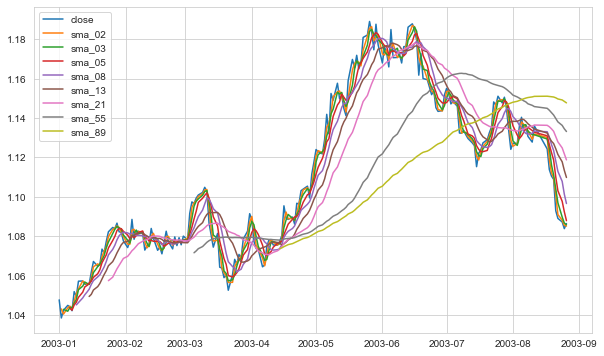

In [10]:
plt.figure(figsize=(10,6))

plt.plot(df_d1_merge['close'][:200], label='close')
plt.plot(df_d1_merge['sma_02'][:200], label='sma_02')
plt.plot(df_d1_merge['sma_03'][:200], label='sma_03')
plt.plot(df_d1_merge['sma_05'][:200], label='sma_05')
plt.plot(df_d1_merge['sma_08'][:200], label='sma_08')
plt.plot(df_d1_merge['sma_13'][:200], label='sma_13')
plt.plot(df_d1_merge['sma_21'][:200], label='sma_21')
plt.plot(df_d1_merge['sma_55'][:200], label='sma_55')
plt.plot(df_d1_merge['sma_89'][:200], label='sma_89')

#plt.title(label = 'EURUSD D1 Close', fontsize=16)
plt.legend()

In [11]:
#df_d1_merge.boxplot(column=["close_sma_02_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_sma_03_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_sma_05_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_sma_08_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_sma_13_dist"], by=['results'])
#df_d1_merge.boxplot(column=["close_sma_21_dist"], by=['results'])

In [12]:
df_d1_merge['sma_03m02'] = (df_d1_merge['sma_03'] - df_d1_merge['sma_02'])*1000
df_d1_merge['sma_05m03'] = (df_d1_merge['sma_05'] - df_d1_merge['sma_03'])*1000
df_d1_merge['sma_05m02'] = (df_d1_merge['sma_05'] - df_d1_merge['sma_02'])*1000
df_d1_merge['sma_08m05'] = (df_d1_merge['sma_08'] - df_d1_merge['sma_05'])*1000
df_d1_merge['sma_08m03'] = (df_d1_merge['sma_08'] - df_d1_merge['sma_03'])*1000
df_d1_merge['sma_08m02'] = (df_d1_merge['sma_08'] - df_d1_merge['sma_02'])*1000
df_d1_merge['sma_13m08'] = (df_d1_merge['sma_13'] - df_d1_merge['sma_08'])*1000
df_d1_merge['sma_13m05'] = (df_d1_merge['sma_13'] - df_d1_merge['sma_05'])*1000
df_d1_merge['sma_13m03'] = (df_d1_merge['sma_13'] - df_d1_merge['sma_03'])*1000
df_d1_merge['sma_13m02'] = (df_d1_merge['sma_13'] - df_d1_merge['sma_02'])*1000
df_d1_merge['sma_21m13'] = (df_d1_merge['sma_21'] - df_d1_merge['sma_13'])*1000
df_d1_merge['sma_21m08'] = (df_d1_merge['sma_21'] - df_d1_merge['sma_08'])*1000
df_d1_merge['sma_21m05'] = (df_d1_merge['sma_21'] - df_d1_merge['sma_05'])*1000
df_d1_merge['sma_21m03'] = (df_d1_merge['sma_21'] - df_d1_merge['sma_03'])*1000
df_d1_merge['sma_21m02'] = (df_d1_merge['sma_21'] - df_d1_merge['sma_02'])*1000
df_d1_merge['sma_34m21'] = (df_d1_merge['sma_34'] - df_d1_merge['sma_21'])*1000
df_d1_merge['sma_34m13'] = (df_d1_merge['sma_34'] - df_d1_merge['sma_13'])*1000
df_d1_merge['sma_34m08'] = (df_d1_merge['sma_34'] - df_d1_merge['sma_08'])*1000
df_d1_merge['sma_34m05'] = (df_d1_merge['sma_34'] - df_d1_merge['sma_05'])*1000
df_d1_merge['sma_34m03'] = (df_d1_merge['sma_34'] - df_d1_merge['sma_03'])*1000
df_d1_merge['sma_34m02'] = (df_d1_merge['sma_34'] - df_d1_merge['sma_02'])*1000
df_d1_merge['sma_55m34'] = (df_d1_merge['sma_55'] - df_d1_merge['sma_34'])*1000
df_d1_merge['sma_55m21'] = (df_d1_merge['sma_55'] - df_d1_merge['sma_21'])*1000
df_d1_merge['sma_55m13'] = (df_d1_merge['sma_55'] - df_d1_merge['sma_13'])*1000
df_d1_merge['sma_55m08'] = (df_d1_merge['sma_55'] - df_d1_merge['sma_08'])*1000
df_d1_merge['sma_55m05'] = (df_d1_merge['sma_55'] - df_d1_merge['sma_05'])*1000
df_d1_merge['sma_55m03'] = (df_d1_merge['sma_55'] - df_d1_merge['sma_03'])*1000
df_d1_merge['sma_55m02'] = (df_d1_merge['sma_55'] - df_d1_merge['sma_02'])*1000
df_d1_merge['sma_89m55'] = (df_d1_merge['sma_89'] - df_d1_merge['sma_55'])*1000
df_d1_merge['sma_89m34'] = (df_d1_merge['sma_89'] - df_d1_merge['sma_34'])*1000
df_d1_merge['sma_89m21'] = (df_d1_merge['sma_89'] - df_d1_merge['sma_21'])*1000
df_d1_merge['sma_89m13'] = (df_d1_merge['sma_89'] - df_d1_merge['sma_13'])*1000
df_d1_merge['sma_89m08'] = (df_d1_merge['sma_89'] - df_d1_merge['sma_08'])*1000
df_d1_merge['sma_89m05'] = (df_d1_merge['sma_89'] - df_d1_merge['sma_05'])*1000
df_d1_merge['sma_89m03'] = (df_d1_merge['sma_89'] - df_d1_merge['sma_03'])*1000
df_d1_merge['sma_89m02'] = (df_d1_merge['sma_89'] - df_d1_merge['sma_02'])*1000



In [13]:
#df_d1_merge.boxplot(column=["sma_03m02"], by=['results'])
#df_d1_merge.boxplot(column=["sma_05m03"], by=['results'])
#df_d1_merge.boxplot(column=["sma_05m02"], by=['results'])
#df_d1_merge.boxplot(column=["sma_08m05"], by=['results'])
#df_d1_merge.boxplot(column=["sma_08m03"], by=['results'])
#df_d1_merge.boxplot(column=["sma_08m02"], by=['results'])
#df_d1_merge.boxplot(column=["sma_13m08"], by=['results'])
#df_d1_merge.boxplot(column=["sma_13m05"], by=['results'])
#df_d1_merge.boxplot(column=["sma_13m03"], by=['results'])
#df_d1_merge.boxplot(column=["sma_13m02"], by=['results'])
#df_d1_merge.boxplot(column=["sma_21m13"], by=['results'])
#df_d1_merge.boxplot(column=["sma_21m08"], by=['results'])
#df_d1_merge.boxplot(column=["sma_21m05"], by=['results'])
#df_d1_merge.boxplot(column=["sma_21m03"], by=['results'])
#df_d1_merge.boxplot(column=["sma_21m02"], by=['results'])

## Relative Strength Index

In [14]:
df_d1_merge['diff'] = df_d1_merge['close'].diff()
df_d1_merge['gain'] = df_d1_merge['diff'].map(lambda cell: 0 if cell<0 else cell )
df_d1_merge['loss'] = df_d1_merge['diff'].map(lambda cell: 0 if cell>0 else cell )
df_d1_merge['loss'] = abs(df_d1_merge['loss'])

In [15]:
def rsi (range):
    df_d1_merge['roll_up'] = df_d1_merge['gain'].ewm(span=range).mean()
    df_d1_merge['roll_dn'] = df_d1_merge['loss'].ewm(span=range).mean()
    df_d1_merge['rs'] = df_d1_merge['roll_up']/df_d1_merge['roll_dn']
    df_d1_merge[f'rsi_{range}'] = 100.0 - (100.0 / (1.0 + df_d1_merge['rs']))
    df_d1_merge.drop(['roll_up','roll_dn','rs'], axis=1, inplace=True)

In [16]:
rsi(14)

In [17]:
df_d1_merge['rsi_14_shift_01'] = df_d1_merge['rsi_14'].shift(1)
df_d1_merge['rsi_14_shift_01_dist'] = (df_d1_merge['rsi_14_shift_01'] - df_d1_merge['rsi_14'])

df_d1_merge['rsi_14_shift_02'] = df_d1_merge['rsi_14'].shift(2)
df_d1_merge['rsi_14_shift_02_dist'] = (df_d1_merge['rsi_14_shift_02'] - df_d1_merge['rsi_14'])

df_d1_merge['rsi_14_shift_03'] = df_d1_merge['rsi_14'].shift(3)
df_d1_merge['rsi_14_shift_03_dist'] = (df_d1_merge['rsi_14_shift_03'] - df_d1_merge['rsi_14'])

df_d1_merge['rsi_14_shift_05'] = df_d1_merge['rsi_14'].shift(5)
df_d1_merge['rsi_14_shift_05_dist'] = (df_d1_merge['rsi_14_shift_05'] - df_d1_merge['rsi_14'])

df_d1_merge['rsi_14_shift_08'] = df_d1_merge['rsi_14'].shift(8)
df_d1_merge['rsi_14_shift_08_dist'] = (df_d1_merge['rsi_14_shift_08'] - df_d1_merge['rsi_14'])

df_d1_merge['rsi_14_shift_13'] = df_d1_merge['rsi_14'].shift(13)
df_d1_merge['rsi_14_shift_13_dist'] = (df_d1_merge['rsi_14_shift_13'] - df_d1_merge['rsi_14'])

df_d1_merge['rsi_14_shift_21'] = df_d1_merge['rsi_14'].shift(21)
df_d1_merge['rsi_14_shift_21_dist'] = (df_d1_merge['rsi_14_shift_21'] - df_d1_merge['rsi_14'])


In [18]:
df_d1_merge['rsi_14_shift_02m01'] = (df_d1_merge['rsi_14_shift_02'] - df_d1_merge['rsi_14_shift_01'])
df_d1_merge['rsi_14_shift_03m02'] = (df_d1_merge['rsi_14_shift_03'] - df_d1_merge['rsi_14_shift_02'])
df_d1_merge['rsi_14_shift_03m01'] = (df_d1_merge['rsi_14_shift_03'] - df_d1_merge['rsi_14_shift_01'])
df_d1_merge['rsi_14_shift_05m03'] = (df_d1_merge['rsi_14_shift_05'] - df_d1_merge['rsi_14_shift_03'])
df_d1_merge['rsi_14_shift_03m02'] = (df_d1_merge['rsi_14_shift_05'] - df_d1_merge['rsi_14_shift_02'])
df_d1_merge['rsi_14_shift_03m01'] = (df_d1_merge['rsi_14_shift_05'] - df_d1_merge['rsi_14_shift_01'])
df_d1_merge['rsi_14_shift_08m05'] = (df_d1_merge['rsi_14_shift_08'] - df_d1_merge['rsi_14_shift_05'])
df_d1_merge['rsi_14_shift_08m03'] = (df_d1_merge['rsi_14_shift_08'] - df_d1_merge['rsi_14_shift_03'])
df_d1_merge['rsi_14_shift_08m02'] = (df_d1_merge['rsi_14_shift_08'] - df_d1_merge['rsi_14_shift_02'])
df_d1_merge['rsi_14_shift_08m01'] = (df_d1_merge['rsi_14_shift_08'] - df_d1_merge['rsi_14_shift_01'])
df_d1_merge['rsi_14_shift_13m08'] = (df_d1_merge['rsi_14_shift_13'] - df_d1_merge['rsi_14_shift_08'])
df_d1_merge['rsi_14_shift_13m05'] = (df_d1_merge['rsi_14_shift_13'] - df_d1_merge['rsi_14_shift_05'])
df_d1_merge['rsi_14_shift_13m03'] = (df_d1_merge['rsi_14_shift_13'] - df_d1_merge['rsi_14_shift_03'])
df_d1_merge['rsi_14_shift_13m02'] = (df_d1_merge['rsi_14_shift_13'] - df_d1_merge['rsi_14_shift_02'])
df_d1_merge['rsi_14_shift_13m01'] = (df_d1_merge['rsi_14_shift_13'] - df_d1_merge['rsi_14_shift_01'])
df_d1_merge['rsi_14_shift_21m13'] = (df_d1_merge['rsi_14_shift_21'] - df_d1_merge['rsi_14_shift_13'])
df_d1_merge['rsi_14_shift_21m08'] = (df_d1_merge['rsi_14_shift_21'] - df_d1_merge['rsi_14_shift_08'])
df_d1_merge['rsi_14_shift_21m05'] = (df_d1_merge['rsi_14_shift_21'] - df_d1_merge['rsi_14_shift_05'])
df_d1_merge['rsi_14_shift_21m03'] = (df_d1_merge['rsi_14_shift_21'] - df_d1_merge['rsi_14_shift_03'])
df_d1_merge['rsi_14_shift_21m02'] = (df_d1_merge['rsi_14_shift_21'] - df_d1_merge['rsi_14_shift_02'])
df_d1_merge['rsi_14_shift_21m01'] = (df_d1_merge['rsi_14_shift_21'] - df_d1_merge['rsi_14_shift_01'])


In [19]:
df_d1_merge['rsi_14_sma_02'] = df_d1_merge['rsi_14'].rolling(2).mean()
df_d1_merge['rsi_14_sma_03'] = df_d1_merge['rsi_14'].rolling(3).mean()
df_d1_merge['rsi_14_sma_05'] = df_d1_merge['rsi_14'].rolling(5).mean()
df_d1_merge['rsi_14_sma_08'] = df_d1_merge['rsi_14'].rolling(8).mean()
df_d1_merge['rsi_14_sma_13'] = df_d1_merge['rsi_14'].rolling(13).mean()
df_d1_merge['rsi_14_sma_21'] = df_d1_merge['rsi_14'].rolling(21).mean()

In [20]:
df_d1_merge['rsi_14_sma_03m02'] = (df_d1_merge['rsi_14_sma_03'] - df_d1_merge['rsi_14_sma_02'])
df_d1_merge['rsi_14_sma_05m03'] = (df_d1_merge['rsi_14_sma_05'] - df_d1_merge['rsi_14_sma_03'])
df_d1_merge['rsi_14_sma_05m02'] = (df_d1_merge['rsi_14_sma_05'] - df_d1_merge['rsi_14_sma_02'])
df_d1_merge['rsi_14_sma_08m05'] = (df_d1_merge['rsi_14_sma_08'] - df_d1_merge['rsi_14_sma_05'])
df_d1_merge['rsi_14_sma_08m03'] = (df_d1_merge['rsi_14_sma_08'] - df_d1_merge['rsi_14_sma_03'])
df_d1_merge['rsi_14_sma_08m02'] = (df_d1_merge['rsi_14_sma_08'] - df_d1_merge['rsi_14_sma_02'])
df_d1_merge['rsi_14_sma_13m08'] = (df_d1_merge['rsi_14_sma_13'] - df_d1_merge['rsi_14_sma_08'])
df_d1_merge['rsi_14_sma_13m05'] = (df_d1_merge['rsi_14_sma_13'] - df_d1_merge['rsi_14_sma_05'])
df_d1_merge['rsi_14_sma_13m03'] = (df_d1_merge['rsi_14_sma_13'] - df_d1_merge['rsi_14_sma_03'])
df_d1_merge['rsi_14_sma_13m02'] = (df_d1_merge['rsi_14_sma_13'] - df_d1_merge['rsi_14_sma_02'])
df_d1_merge['rsi_14_sma_21m13'] = (df_d1_merge['rsi_14_sma_21'] - df_d1_merge['rsi_14_sma_13'])
df_d1_merge['rsi_14_sma_21m08'] = (df_d1_merge['rsi_14_sma_21'] - df_d1_merge['rsi_14_sma_08'])
df_d1_merge['rsi_14_sma_21m05'] = (df_d1_merge['rsi_14_sma_21'] - df_d1_merge['rsi_14_sma_05'])
df_d1_merge['rsi_14_sma_21m03'] = (df_d1_merge['rsi_14_sma_21'] - df_d1_merge['rsi_14_sma_03'])
df_d1_merge['rsi_14_sma_21m02'] = (df_d1_merge['rsi_14_sma_21'] - df_d1_merge['rsi_14_sma_02'])


In [21]:
df_d1_merge.head(10)

,open,high,low,close,results,day_of_wk,shift_01,close_shift_01_dist,shift_02,close_shift_02_dist,shift_03,close_shift_03_dist,shift_05,close_shift_05_dist,shift_08,close_shift_08_dist,shift_13,close_shift_13_dist,shift_21,close_shift_21_dist,shift_34,close_shift_34_dist,shift_55,close_shift_55_dist,shift_89,close_shift_87_dist,shift_02m01,shift_03m02,shift_03m01,shift_05m03,shift_05m02,shift_05m01,shift_08m05,shift_08m03,shift_08m02,shift_08m01,shift_13m08,shift_13m05,shift_13m03,shift_13m02,shift_13m01,shift_21m13,shift_21m08,shift_21m05,shift_21m03,shift_21m02,shift_21m01,shift_34m21,shift_34m13,shift_34m08,shift_34m05,shift_34m03,shift_34m02,shift_34m01,shift_55m34,shift_55m21,shift_55m13,shift_55m08,shift_55m05,shift_55m03,shift_55m02,shift_55m01,shift_89m55,shift_89m34,shift_89m21,shift_89m13,shift_89m08,shift_89m05,shift_89m03,shift_89m02,shift_89m01,sma_02,close_sma_02_dist,sma_03,close_sma_03_dist,sma_05,close_sma_05_dist,sma_08,close_sma_08_dist,sma_13,close_sma_13_dist,sma_21,close_sma_21_dist,sma_34,close_sma_34_dist,sma_55,close_sma_55_dist,sma_89,close_sma_89_dist,sma_03m02,sma_05m03,sma_05m02,sma_08m05,sma_08m03,sma_08m02,sma_13m08,sma_13m05,sma_13m03,sma_13m02,sma_21m13,sma_21m08,sma_21m05,sma_21m03,sma_21m02,sma_34m21,sma_34m13,sma_34m08,sma_34m05,sma_34m03,sma_34m02,sma_55m34,sma_55m21,sma_55m13,sma_55m08,sma_55m05,sma_55m03,sma_55m02,sma_89m55,sma_89m34,sma_89m21,sma_89m13,sma_89m08,sma_89m05,sma_89m03,sma_89m02,diff,gain,loss,rsi_14,rsi_14_shift_01,rsi_14_shift_01_dist,rsi_14_shift_02,rsi_14_shift_02_dist,rsi_14_shift_03,rsi_14_shift_03_dist,rsi_14_shift_05,rsi_14_shift_05_dist,rsi_14_shift_08,rsi_14_shift_08_dist,rsi_14_shift_13,rsi_14_shift_13_dist,rsi_14_shift_21,rsi_14_shift_21_dist,rsi_14_shift_02m01,rsi_14_shift_03m02,rsi_14_shift_03m01,rsi_14_shift_05m03,rsi_14_shift_08m05,rsi_14_shift_08m03,rsi_14_shift_08m02,rsi_14_shift_08m01,rsi_14_shift_13m08,rsi_14_shift_13m05,rsi_14_shift_13m03,rsi_14_shift_13m02,rsi_14_shift_13m01,rsi_14_shift_21m13,rsi_14_shift_21m08,rsi_14_shift_21m05,rsi_14_shift_21m03,rsi_14_shift_21m02,rsi_14_shift_21m01,rsi_14_sma_02,rsi_14_sma_03,rsi_14_sma_05,rsi_14_sma_08,rsi_14_sma_13,rsi_14_sma_21,rsi_14_sma_03m02,rsi_14_sma_05m03,rsi_14_sma_05m02,rsi_14_sma_08m05,rsi_14_sma_08m03,rsi_14_sma_08m02,rsi_14_sma_13m08,rsi_14_sma_13m05,rsi_14_sma_13m03,rsi_14_sma_13m02,rsi_14_sma_21m13,rsi_14_sma_21m08,rsi_14_sma_21m05,rsi_14_sma_21m03,rsi_14_sma_21m02
2003-01-01,1.0504,1.0504,1.0468,1.0476,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-02,1.0475,1.0488,1.0338,1.0384,1,3,1.0476,-9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04300,-4.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0092,0.0000,0.0092,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,1.0383,1.0437,1.0342,1.0423

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


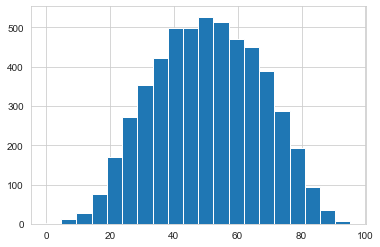

In [22]:
plt.hist(df_d1_merge['rsi_14'],bins=20);

In [23]:
df_d1_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5300 entries, 2003-01-01 to 2019-12-23
Columns: 183 entries, open to rsi_14_sma_21m02
dtypes: float64(181), int64(2)
memory usage: 7.4 MB


In [24]:
df_d1_merge.to_csv('../data/df_d1_feature.csv', index=True)

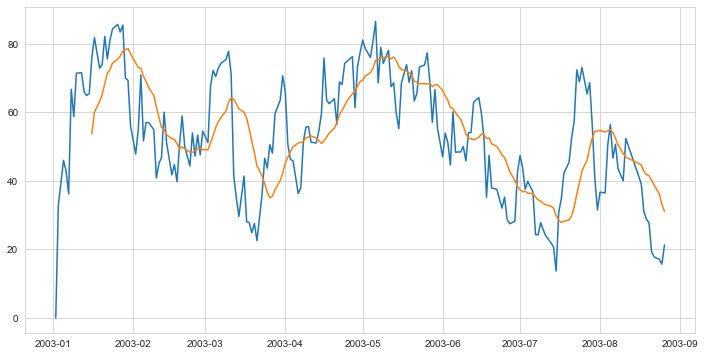

In [25]:
plt.figure(figsize=(12,6))

plt.plot(df_d1_merge['rsi_14'][:200], label='rsi14')
#plt.plot(df_d1_merge['rsi_14_sma_02'][:200], label='rsi14_sma02')
#plt.plot(df_d1_merge['rsi_14_sma_03'][:200], label='rsi14_sma03')
#plt.plot(df_d1_merge['rsi_14_sma_05'][:200], label='rsi14_sma05')
#plt.plot(df_d1_merge['rsi_14_sma_08'][:200], label='rsi14_sma08')
plt.plot(df_d1_merge['rsi_14_sma_13'][:200], label='rsi14_sma13')